# I. Introduction.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import minmax_scale

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In this work was trained binary classifier, for this purpose was used Titanic dataset. Different approaches have been used to analyze the results from the individual models used in this work and to compare them. After the analysis of the results, the best model was used for evaluation on the testing set.

# II. Data handling.

In [4]:
titanic_data_train = pd.read_csv("/kaggle/input/d/pavlintsonev/titanic-dataset/train.csv", index_col="PassengerId")

In [5]:
titanic_data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
titanic_data_train["Age"].fillna(titanic_data_train["Age"].mean(), inplace=True)

/tmp/ipykernel_33/1771620126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data_train["Age"].fillna(titanic_data_train["Age"].mean(), inplace=True)


In [7]:
titanic_data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
titanic_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
titanic_data_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [10]:
titanic_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [11]:
titanic_data_train.dropna(inplace=True)

In [12]:
titanic_data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [13]:
titanic_data_train['Pclass'] = titanic_data_train['Pclass'].astype('category')

In [14]:
titanic_data_train = pd.get_dummies(titanic_data_train, dtype=int, drop_first=True)

In [15]:
titanic_data_train

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,22.000000,1,0,7.2500,0,1,1,0,1
2,1,38.000000,1,0,71.2833,0,0,0,0,0
3,1,26.000000,0,0,7.9250,0,1,0,0,1
4,1,35.000000,1,0,53.1000,0,0,0,0,1
5,0,35.000000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,27.000000,0,0,13.0000,1,0,1,0,1
888,1,19.000000,0,0,30.0000,0,0,0,0,1
889,0,29.699118,1,2,23.4500,0,1,0,0,1


In [80]:
titanic_data_test = pd.read_csv("/kaggle/input/d/pavlintsonev/titanic-dataset/test.csv", index_col="PassengerId")

In [81]:
titanic_data_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [82]:
titanic_data_test["Survived"] = pd.read_csv("/kaggle/input/d/pavlintsonev/titanic-dataset/gender_submission.csv", index_col="PassengerId")

In [83]:
titanic_data_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0


In [84]:
titanic_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Survived  418 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [85]:
titanic_data_test["Age"].fillna(titanic_data_test["Age"].mean(), inplace=True)

/tmp/ipykernel_33/2494785386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data_test["Age"].fillna(titanic_data_test["Age"].mean(), inplace=True)


In [86]:
titanic_data_test.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [87]:
titanic_data_test.dropna(axis=0, inplace=True)

In [88]:
titanic_data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,
892,3,male,34.50000,0,0,7.8292,Q,0
893,3,female,47.00000,1,0,7.0000,S,1
894,2,male,62.00000,0,0,9.6875,Q,0
895,3,male,27.00000,0,0,8.6625,S,0
896,3,female,22.00000,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...
1305,3,male,30.27259,0,0,8.0500,S,0
1306,1,female,39.00000,0,0,108.9000,C,1
1307,3,male,38.50000,0,0,7.2500,S,0


In [89]:
titanic_data_test['Pclass'] = titanic_data_test['Pclass'].astype('category')

In [90]:
titanic_data_test = pd.get_dummies(titanic_data_test, dtype=int, drop_first=True)

In [91]:
titanic_data_test

,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,34.50000,0,0,7.8292,0,0,1,1,1,0
893,47.00000,1,0,7.0000,1,0,1,0,0,1
894,62.00000,0,0,9.6875,0,1,0,1,1,0
895,27.00000,0,0,8.6625,0,0,1,1,0,1
896,22.00000,1,1,12.2875,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,30.27259,0,0,8.0500,0,0,1,1,0,1
1306,39.00000,0,0,108.9000,1,0,0,0,0,0
1307,38.50000,0,0,7.2500,0,0,1,1,0,1


In [92]:
train_features = titanic_data_train.drop(["Survived"], axis=1)
train_labels = titanic_data_train["Survived"]
test_features = titanic_data_test.drop(["Survived"], axis=1)
test_labels = titanic_data_test["Survived"]

In [93]:
train_features

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,22.000000,1,0,7.2500,0,1,1,0,1
2,38.000000,1,0,71.2833,0,0,0,0,0
3,26.000000,0,0,7.9250,0,1,0,0,1
4,35.000000,1,0,53.1000,0,0,0,0,1
5,35.000000,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
887,27.000000,0,0,13.0000,1,0,1,0,1
888,19.000000,0,0,30.0000,0,0,0,0,1
889,29.699118,1,2,23.4500,0,1,0,0,1


In [95]:
train_features = pd.DataFrame(minmax_scale(train_features), columns = train_features.columns)
test_features = pd.DataFrame(minmax_scale(test_features), columns = test_features.columns)

In [96]:
train_features

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.271174,0.125,0.000000,0.014151,0.0,1.0,1.0,0.0,1.0
1,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,1.0
3,0.434531,0.125,0.000000,0.103644,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.000,0.000000,0.015713,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
884,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0,0.0,1.0
885,0.233476,0.000,0.000000,0.058556,0.0,0.0,0.0,0.0,1.0
886,0.367921,0.125,0.333333,0.045771,0.0,1.0,0.0,0.0,1.0
887,0.321438,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0,0.0


# III. Training and evaluating the models.

In [28]:
logistic_regr = LogisticRegression()

In [29]:
param_grid = [{"C": [1, 5, 10], "max_iter": [10, 100, 500, 1000, 5000, 10000]}]

In [30]:
grid_search_lr = GridSearchCV(logistic_regr, param_grid, scoring="accuracy", cv=5)

In [31]:
grid_search_lr.fit(train_features, train_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 5, 10],
                          'max_iter': [10, 100, 500, 1000, 5000, 10000]}],
             scoring='accuracy')

In [32]:
lr_model = grid_search_lr.best_estimator_

In [33]:
grid_search_lr.best_score_

0.7919443915444677

In [34]:
cvres = grid_search_lr.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7896781565416111 {'C': 1, 'max_iter': 10}
0.7908017520472291 {'C': 1, 'max_iter': 100}
0.7908017520472291 {'C': 1, 'max_iter': 500}
0.7908017520472291 {'C': 1, 'max_iter': 1000}
0.7908017520472291 {'C': 1, 'max_iter': 5000}
0.7908017520472291 {'C': 1, 'max_iter': 10000}
0.786313718021964 {'C': 5, 'max_iter': 10}
0.7919443915444677 {'C': 5, 'max_iter': 100}
0.7919443915444677 {'C': 5, 'max_iter': 500}
0.7919443915444677 {'C': 5, 'max_iter': 1000}
0.7919443915444677 {'C': 5, 'max_iter': 5000}
0.7919443915444677 {'C': 5, 'max_iter': 10000}
0.787443661524789 {'C': 10, 'max_iter': 10}
0.7908207960388498 {'C': 10, 'max_iter': 100}
0.7908207960388498 {'C': 10, 'max_iter': 500}
0.7908207960388498 {'C': 10, 'max_iter': 1000}
0.7908207960388498 {'C': 10, 'max_iter': 5000}
0.7908207960388498 {'C': 10, 'max_iter': 10000}


In [35]:
random_forest = RandomForestClassifier()

In [36]:
param_grid = [
    {'n_estimators': [5, 10, 50, 100, 500], 'max_features': [2, 4, 6, 8, 10, 12, 14, 16]}
]

In [37]:
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12, 14, 16],
                          'n_estimators': [5, 10, 50, 100, 500]}],
             scoring='accuracy')

In [38]:
rf_model = grid_search_rf.best_estimator_

In [39]:
grid_search_rf.best_score_

0.8222941661905668

In [40]:
cvres = grid_search_rf.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7908144480416428 {'max_features': 2, 'n_estimators': 5}
0.8143972576652067 {'max_features': 2, 'n_estimators': 10}
0.8076874246175331 {'max_features': 2, 'n_estimators': 50}
0.8031866945978544 {'max_features': 2, 'n_estimators': 100}
0.8054275376118835 {'max_features': 2, 'n_estimators': 500}
0.7953024820669079 {'max_features': 4, 'n_estimators': 5}
0.8110582111343871 {'max_features': 4, 'n_estimators': 10}
0.8166888846568907 {'max_features': 4, 'n_estimators': 50}
0.8222941661905668 {'max_features': 4, 'n_estimators': 100}
0.812188154637212 {'max_features': 4, 'n_estimators': 500}
0.7986923125753824 {'max_features': 6, 'n_estimators': 5}
0.8155525931568588 {'max_features': 6, 'n_estimators': 10}
0.8110709071288008 {'max_features': 6, 'n_estimators': 50}
0.8144353456484479 {'max_features': 6, 'n_estimators': 100}
0.815558941154066 {'max_features': 6, 'n_estimators': 500}
0.7885228210499587 {'max_features': 8, 'n_estimators': 5}
0.8099473116231829 {'max_features': 8, 'n_estimators': 1

In [41]:
sgd_class = SGDClassifier()

In [42]:
param_grid = [
    {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1], 'max_iter': [10, 100, 1000, 10000, 100000, 1000000]}
]

In [43]:
grid_search_sgd = GridSearchCV(sgd_class, param_grid, cv=5, scoring='accuracy')
grid_search_sgd.fit(train_features, train_labels)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                          'max_iter': [10, 100, 1000, 10000, 100000, 1000000]}],
             scoring='accuracy')

In [44]:
sgd_model = grid_search_sgd.best_estimator_

In [45]:
grid_search_sgd.best_score_

0.7964387735669397

In [46]:
cvres = grid_search_sgd.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7492033263505364 {'alpha': 1e-05, 'max_iter': 10}
0.7412556338475211 {'alpha': 1e-05, 'max_iter': 100}
0.6389576588586301 {'alpha': 1e-05, 'max_iter': 1000}
0.7166444486764426 {'alpha': 1e-05, 'max_iter': 10000}
0.7806703485050466 {'alpha': 1e-05, 'max_iter': 100000}
0.7121437186567638 {'alpha': 1e-05, 'max_iter': 1000000}
0.7480606868532977 {'alpha': 0.0001, 'max_iter': 10}
0.7728115279629277 {'alpha': 0.0001, 'max_iter': 100}
0.7795531009966356 {'alpha': 0.0001, 'max_iter': 1000}
0.7750587189741636 {'alpha': 0.0001, 'max_iter': 10000}
0.7424681013140354 {'alpha': 0.0001, 'max_iter': 100000}
0.7525804608645972 {'alpha': 0.0001, 'max_iter': 1000000}
0.7964387735669397 {'alpha': 0.001, 'max_iter': 10}
0.7885228210499587 {'alpha': 0.001, 'max_iter': 100}
0.7873992255443407 {'alpha': 0.001, 'max_iter': 1000}
0.7885228210499587 {'alpha': 0.001, 'max_iter': 10000}
0.7851520345331048 {'alpha': 0.001, 'max_iter': 100000}
0.7896591125499904 {'alpha': 0.001, 'max_iter': 1000000}
0.78627563003

In [47]:
k_class = KNeighborsClassifier()

In [48]:
param_grid = [
    {'n_neighbors': [2, 4, 6, 8, 10], "leaf_size": [1, 2, 5, 10, 30, 100, 200, 500]}
]

In [49]:
grid_search_k = GridSearchCV(k_class, param_grid, cv=5, scoring='accuracy')
grid_search_k.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [1, 2, 5, 10, 30, 100, 200, 500],
                          'n_neighbors': [2, 4, 6, 8, 10]}],
             scoring='accuracy')

In [50]:
k_model = grid_search_k.best_estimator_

In [51]:
grid_search_k.best_score_

0.7997651241033454

In [52]:
cvres = grid_search_k.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.788567257030407 {'leaf_size': 1, 'n_neighbors': 2}
0.7907763600584016 {'leaf_size': 1, 'n_neighbors': 4}
0.7952643940836666 {'leaf_size': 1, 'n_neighbors': 6}
0.7997651241033454 {'leaf_size': 1, 'n_neighbors': 8}
0.7963879895892847 {'leaf_size': 1, 'n_neighbors': 10}
0.788567257030407 {'leaf_size': 2, 'n_neighbors': 2}
0.7907763600584016 {'leaf_size': 2, 'n_neighbors': 4}
0.7952643940836666 {'leaf_size': 2, 'n_neighbors': 6}
0.7997651241033454 {'leaf_size': 2, 'n_neighbors': 8}
0.7963879895892847 {'leaf_size': 2, 'n_neighbors': 10}
0.788567257030407 {'leaf_size': 5, 'n_neighbors': 2}
0.7907763600584016 {'leaf_size': 5, 'n_neighbors': 4}
0.7952643940836666 {'leaf_size': 5, 'n_neighbors': 6}
0.7986351806005205 {'leaf_size': 5, 'n_neighbors': 8}
0.7963879895892847 {'leaf_size': 5, 'n_neighbors': 10}
0.788567257030407 {'leaf_size': 10, 'n_neighbors': 2}
0.7907763600584016 {'leaf_size': 10, 'n_neighbors': 4}
0.7952643940836666 {'leaf_size': 10, 'n_neighbors': 6}
0.7986351806005205 {'leaf_

--------------------------------- Logistic Regression ---------------------------------
[[253  12]
 [ 11 141]]


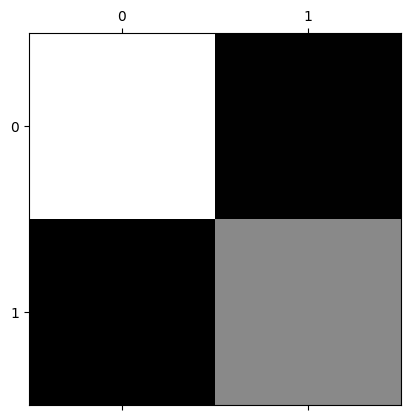

Area under the ROC curve :  0.9839870903674279
Score of model Logistic Regression  :  0.9448441247002398
--------------------------------- Random Forest Classifier ---------------------------------
[[233  32]
 [ 48 104]]


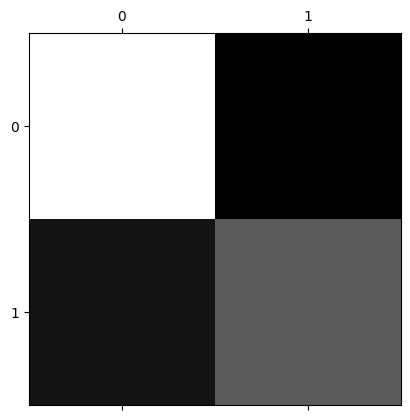

Area under the ROC curve :  0.8800769612711022
Score of model Random Forest Classifier  :  0.8081534772182254
--------------------------------- SGD Classifier ---------------------------------
[[265   0]
 [ 10 142]]


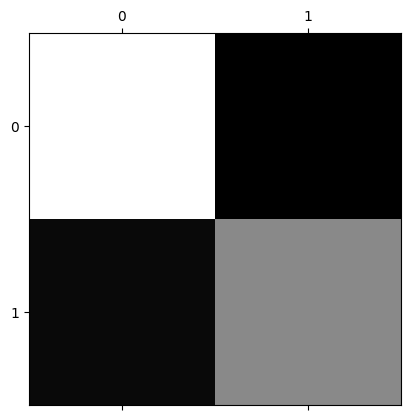

Area under the ROC curve :  0.9977656405163853
Score of model SGD Classifier  :  0.9760191846522782
--------------------------------- K Neighbors Classifier ---------------------------------
[[252  13]
 [ 34 118]]


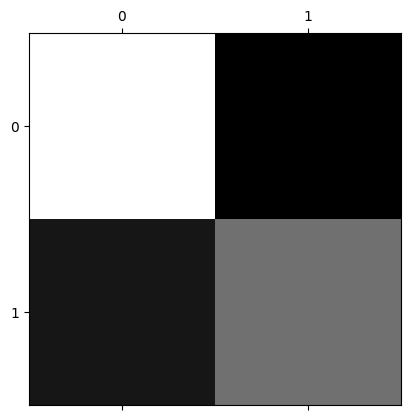

Area under the ROC curve :  0.9444637537239325
Score of model K Neighbors Classifier  :  0.8872901678657075


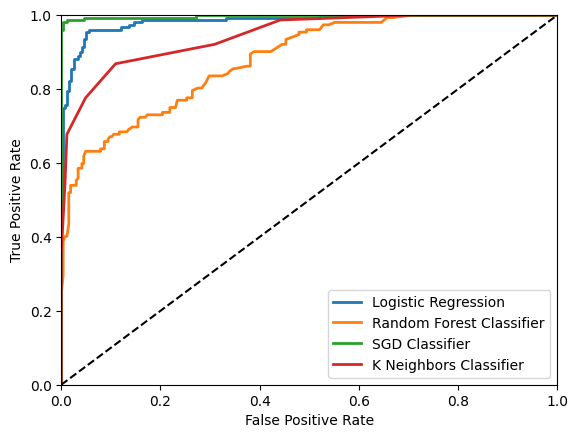

In [127]:
models_names = ["Logistic Regression", "Random Forest Classifier", "SGD Classifier", "K Neighbors Classifier"]

models_list = [lr_model, rf_model, sgd_model, k_model]

fpr_tpr_list = []

for i in range(4):
    print("---------------------------------", models_names[i], "---------------------------------")
    
    predictions = models_list[i].predict(test_features)
    
    conf_mx = confusion_matrix(test_labels, predictions)
    
    print(conf_mx)
    
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    plt.show()
    
    try:
        probas = models_list[i].decision_function(test_features)
    except:
        probas = models_list[i].predict_proba(test_features)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(test_labels, probas)
    
    fpr_tpr_list.append([fpr, tpr])
    
    print("Area under the ROC curve : ", roc_auc_score(test_labels, probas))
    
    print("Score of model", models_names[i], " : ", models_list[i].score(test_features, test_labels))
    
print("=====================================================")
    
for i in range(4):
    plt.plot(fpr_tpr_list[i][0], fpr_tpr_list[i][1], linewidth=2, label=models_names[i])
    
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

# IV. Conclusion.

The models were trained on the same training data. The model SGDClassifier is with best performance on the training set when we talk about Accuracy, Area under the ROC curve and results from confusion matrix. So for this reason this model was selected as the best one. Score over the testing set is much higher than on the training set. The reason behind this perhaps is that the testing set is much easier for the model than the training set. Here is one more time the score of SGDClassifier over the testing set:

In [129]:
sgd_model.score(test_features, test_labels)

0.9760191846522782